### Final Project: Construct 5G Network in Berkeley, CA 

### Introduction
Qualcomm released NSA 5G chip, Apple acquired Intel mobile phone chip business to develop its own 5G chip, Huawei released the first phone that supports SA and NSA 5G signal, all these news are telling us that the period for 5G is coming. It's necessary to construct 5G network to perpare for the period. Therefore, my project foucs on find the best locations for 5G base station. The problem that this project trying to slove is stated in the following. 

<I><b>Find the optimal locations for 5G base stations to construct 5G network in Berkeley, CA that minimize the number of base stations and covers everywhere of Berkeley.</b></I>

This project can be divided into three parts, problem statement, analysis and conclusion. The first part, problem statement, is the restatement of problem with more accuracy word and the transformation from real life problem to mathematic optimization problem, that's the modeling. The second part, analysis, contains all the codes of this project and it can be futher divided into three subparts, imaging preprocessing, optimization and data visulization. The third part, conclusion, contains the error analysis and future directions. 

### Problem Statement
The problem is solved based on the Berkeley map as the following picture shows. Covering everywhere of Berkeley is equivalent to covering all the pixels of the picture. 

First, this real life problem is highly simplified to a mathematic problem but still quite complicate. 



Translated version of the problem: (denote this problem as $(P)$)

min⁡ "the number of base stations"

s.t.  every pixel of map is covered

That’s we translate the problem into a Set Covering Problem. 

In [2]:
%pylab inline
import matplotlib.image as mpimg
from scipy import ndimage
from numpy import linalg as LA

Populating the interactive namespace from numpy and matplotlib


(623, 706, 3)


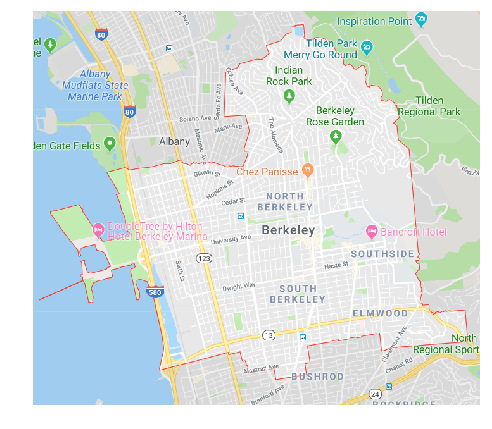

In [3]:
plt.figure(figsize=(8, 8))
berkeley_map = mpimg.imread("./Berkeley.png")
plt.imshow(berkeley_map)
plt.axis("off")

print(berkeley_map.shape)

Next, mathematical expression of the problem:

Let 

$ A $ ={pixels within the boundary of Berkeley,CA}

$ U $ ={disk centered at x with a random redius from 300m to 500m|x∈A}

Denote the elements of $A$ as $x_i$ and elements of $U$ as $X_i$.

Then we can further express the problem $(P)$ as 

$$ min: sum([f(X_i)]) i = 1, ..., |U| $$

$$ s.t.for-any- x_j-in-A,exists-X_i-in-U,f(X_i )*(r_i-|x_j-x_i |_2 )>0 $$ 

$$ r_i ~ gussian-distribution(50,1),i=1,…,|U| $$ 

$$ f(X_i )={0,if X_i  is-not-chosen; 1,if X_i  is-chosen},X_i-in-U $$

I let the radius be a random value that follows gussian distribution to simulate the real situation. 

### Analysis
As you can see, problem $(P)$ is a set covering problem, complex optimization which is nonlinear-hard problem (NP-hard). There is not an efficient algorithm to solve it and find the optimal solution. But we can use the greedy algorithm to find a solution that close to the optimal solution. 
My idea is that find the cover that covers most pixels in the figure in each iteration. Since Berkeley is a small town, the number of needed base stations is small. Therefore, this greedy algorithm can give a solution very close to the optimal solution. 

### Image preprocessing
The first step is get the pixels of Berkeley from the figure "berkeley_map" shown above. 

I tried serval methods to retrive Berkeley from "berkeley_map". Some failed. 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


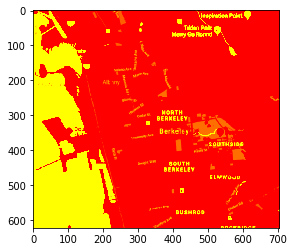

In [4]:
# this is a failed mathod trying to retrive Berkeley from "berkeley_map"

edges = ndimage.sobel(berkeley_map, mode='constant')
imshow(edges)

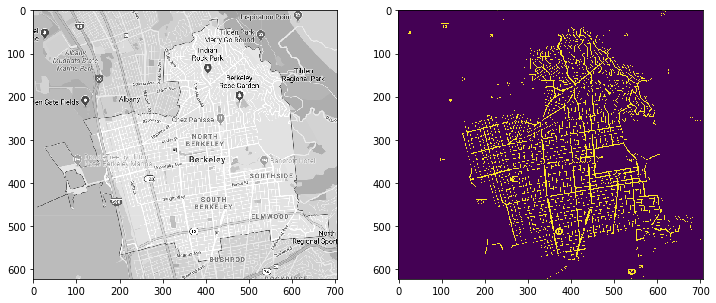

In [6]:
# this is a failed mathod trying to retrive Berkeley from "berkeley_map"

plt.figure(figsize = (12, 6))

plt.subplot(121)
berkeley_map_grey = berkeley_map.sum(axis=2)
imshow(berkeley_map_grey,cmap=cm.gray)

plt.subplot(122)
mask = berkeley_map_grey > 2.9
imshow(mask)

(623, 706)


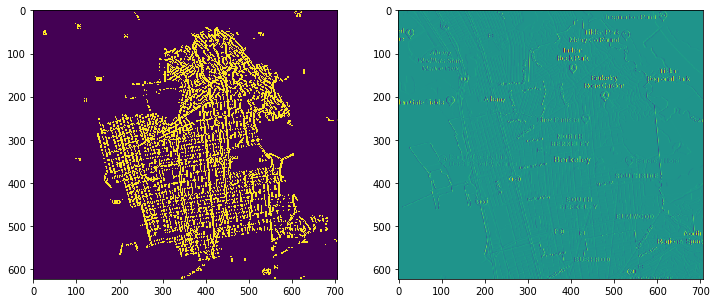

In [7]:
# this is a failed mathod trying to retrive Berkeley from "berkeley_map"

plt.figure(figsize = (12, 6))

plt.subplot(121)
edges_grey_mask = ndimage.sobel(mask, mode='mirror')
imshow(edges_grey_mask)

plt.subplot(122)
edges_grey = ndimage.sobel(berkeley_map_grey, mode='constant')
imshow(edges_grey)
print(edges_grey.shape)

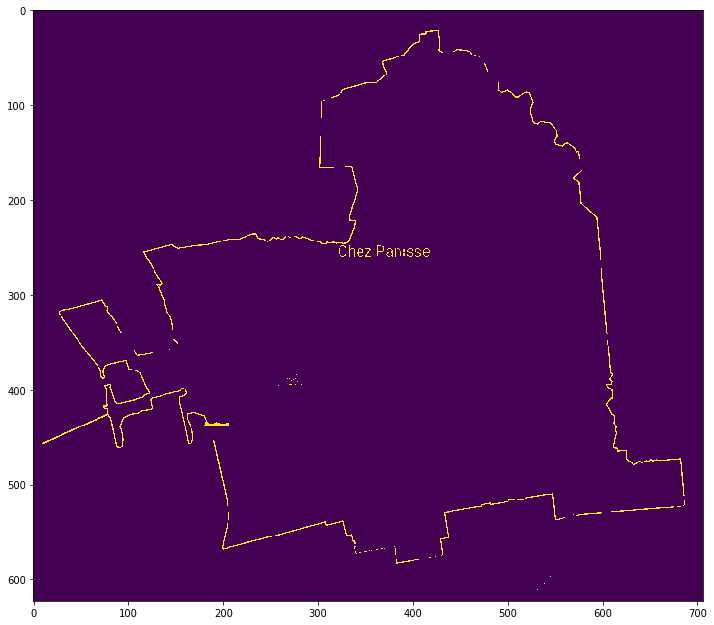

In [9]:
# this block and next block  is a success method!
# first, find the boundary of Berkeley using a filter

plt.figure(figsize = (12, 12))
boundary = np.where((berkeley_map[:,:,0] > 0.55) & (berkeley_map[:,:,1] < 0.6) & (berkeley_map[:,:,2] < 0.6), 1, 0)
boundary[0:200,0:200] = 0; boundary[150:220, 200:300] = 0
imshow(boundary)

(79417, 2)


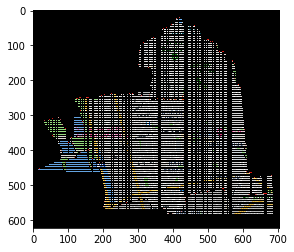

In [10]:
# accounting all the pixels inside the boundary
# we can have an approximated Berkeley as the output shows
# but this approximated figure is enough for this problem, since this figure is dense in the orignal figure
# if all the pixels in this figure is covered, then we can say all the pixels in the orignal map that within the boundary is covered
# moerover, this approximation also reduces the size of domain we are working on

berkeley = np.zeros((623,706,3))
domain = []
index_point = [0, 0]
for i in range(0, 623):
    for j in range(0, 706):
        if boundary[i, j] < 1 & index_point[0] > 0:
            berkeley[i,j] = berkeley_map[i,j]
        elif (boundary[i, j] > 1) & index_point[0] > 0:
            berkeley[i,j] = berkeley_map[i,j]
            index_point = [0, 0]
        elif boundary[i, j] > 1 & index_point[0] == 0:
            index_point = [i,j]
            berkeley[i,j] = berkeley_map[i,j]
        else:
            berkeley[i,j] = [0, 0, 0]
    index_point = [0, 0]

berkeley_h = berkeley
index_point = [0, 0]
berkeley = np.zeros((623,706,3))

for j in range(0, 706):
    for i in range(0, 623):
        if boundary[i, j] < 1 & index_point[0] > 0:
            berkeley[i,j] = berkeley_map[i,j]
        elif (boundary[i, j] > 1) & index_point[0] > 0:
            berkeley[i,j] = berkeley_map[i,j]
            index_point = [0, 0]
        elif boundary[i, j] > 1 & index_point[0] == 0:
            index_point = [i,j]
            berkeley[i,j] = berkeley_map[i,j]
        else:
            berkeley[i,j] = [0, 0, 0]
    index_point = [0, 0]

berkeley_v = berkeley
berkeley = berkeley_h * berkeley_v

for i in range(0, 623):
    for j in range(0, 706):
        if np.sum(berkeley[i,j]) > 0.1:
            domain.append([i,j])
domain = np.array(domain)
len_domain = len(domain)
imshow(berkeley)
print(domain.shape)

In [11]:
# generate the radius of covers for each pixels in the domain
# random choose 1000 possible position to put the base station, actually, this step may reduce the accrucy
# but it also reduces my work and make this greedy algorithm more efficient
# now, we finse the preparation

radius_set = []
for i in domain:
    radius = np.random.normal(50, 1)
    radius_set.append(radius)
radius_set = np.array(radius_set)
print(radius_set.shape)

cover_index_set = np.random.random_integers(len(domain[:,0]), size = (1000,))
cover_set = np.array([domain[i, :] for i in cover_index_set])
print(np.max(cover_index_set))

(79417,)
79328


E:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: DeprecationWarning: This function is deprecated. Please call randint(1, 79417 + 1) instead
  if sys.path[0] == '':


### Optimization
This part is the implement of the greedy algorithm.

In [12]:
# this part is the most difficult part which includs many parameter
# the output 1 is pixels covered in each iteration except the pixels that possible for the locaton of base station
# thr output 2 is the size of domain after each iteration, in each iteration, pixels that are covered is removed from the domain

location_set = []
radius_set_location = []
tester = domain
output = domain
while len(tester[:, 0]) > 4000: # I choose 4000 as the criterion to guarantee more than 99.5% pixels in the domain to be covered. And this also aovid the situation that too many base stations are needed.
    max_base_location = 0
    max_covered_pixels = 0
    delete_set = []
    counter_max = 0
    for i in cover_index_set:
        max_covered_pixels_i = 0
        delete_set_i = []
        block_filt = np.where((output[:, 0] > output[i, 0] - radius_set[i]) & (output[:, 0] < output[i, 0] + radius_set[i]) & (output[:, 1] > output[i, 1] - radius_set[i]) & (output[:, 1] < output[i, 1] + radius_set[i]))
        block = output[block_filt]
        len_block = len(block[:, 0])
        counter_i = 0
        for j in range(0, len_block):
            if np.sqrt((output[i, 0] - block[j, 0])**2 + (output[i, 1] - block[j, 1])**2) <= radius_set[i]:
                counter_i += 1
                base_not_delete = np.where((cover_set[:, 0] == block[j, 0]) & (cover_set[:, 1] == block[j, 1]))
                if len(base_not_delete[0]) > 0:
                    pass
                else:
                    max_covered_pixels_i += 1
                    delete_set_i.append(j)
            else:
                pass
        if max_covered_pixels < max_covered_pixels_i:
            max_covered_pixels = max_covered_pixels_i
            max_base_location = i
            block_max = block
            len_block_max = len_block
            delete_set = delete_set_i
            counter_max = counter_i
    print(max_covered_pixels)

    location_set.append(max_base_location)
    radius_set_location.append(radius_set[i])
    index_max_base_location = np.where(cover_index_set == max_base_location)
    cover_index_set = np.delete(cover_index_set, index_max_base_location[0])
    
    for k in delete_set:
        domain_delete_index = np.where((output[:, 0] == block_max[k, 0]) & (output[:, 1] == block_max[k, 1]))
        output[domain_delete_index[0], :] = [-1000, -1000]
    
    tester_index = np.where(output[:, 0] > 0)
    tester = output[tester_index]
    print(tester.shape)

3762
(75655, 2)
3656
(71999, 2)
3431
(68568, 2)
3418
(65150, 2)
3323
(61827, 2)
3299
(58528, 2)
3181
(55347, 2)
3175
(52172, 2)
3161
(49011, 2)
2973
(46038, 2)
2880
(43158, 2)
2831
(40327, 2)
2777
(37550, 2)
2737
(34813, 2)
2685
(32128, 2)
2437
(29691, 2)
2360
(27331, 2)
2051
(25280, 2)
1979
(23301, 2)
1671
(21630, 2)
1663
(19967, 2)
1547
(18420, 2)
1522
(16898, 2)
1511
(15387, 2)
1433
(13954, 2)
1291
(12663, 2)
1232
(11431, 2)
1046
(10385, 2)
1043
(9342, 2)
1007
(8335, 2)
961
(7374, 2)
876
(6498, 2)
867
(5631, 2)
841
(4790, 2)
524
(4266, 2)
491
(3775, 2)


In [13]:
# locations of the base stations in my solution is stored in appromxiated_optimal_sol
# here, I finish the optimization part

print(location_set)
appromxiated_optimal_sol = []
for i in location_set:
    appromxiated_optimal_sol.append(domain[i, :])
appromxiated_optimal_sol = np.array(appromxiated_optimal_sol)
print(appromxiated_optimal_sol)

[53534, 22760, 18067, 71159, 43966, 69376, 27922, 48803, 48563, 67756, 39380, 7920, 70280, 24702, 8292, 1198, 35783, 71620, 55989, 36042, 4417, 16296, 32619, 17174, 32261, 56456, 11927, 73917, 38816, 67793, 4199, 54385, 53787, 61095, 15787, 27259]
[[447 346]
 [295 377]
 [267 546]
 [539 583]
 [403 130]
 [531 372]
 [323 278]
 [425 566]
 [425 239]
 [523 254]
 [379 406]
 [169 414]
 [535 496]
 [307 178]
 [173 524]
 [ 73 419]
 [361 505]
 [541 645]
 [457 430]
 [363 312]
 [127 339]
 [257 443]
 [345 591]
 [263 266]
 [345  91]
 [459 516]
 [221 350]
 [553 426]
 [377 215]
 [523 310]
 [123 494]
 [451 201]
 [449  84]
 [485 629]
 [255 175]
 [319 450]]


### Data Visualiztion
I will show how the berkeley is cover in this part.

623 706
(439838, 2)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


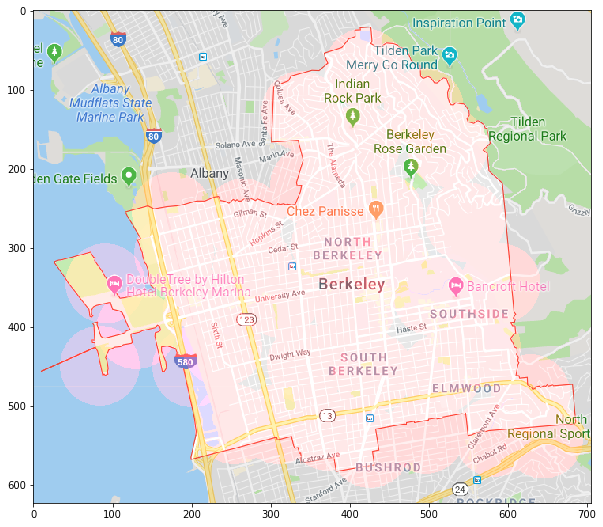

In [16]:
# the red region shows the covered region
# as you can see, the whole Berkeley is covered approximately

berkeley_map_out_counting = []
berkeley_map_out = berkeley_map
X = len(berkeley_map[:, 0, 0])
Y = len(berkeley_map[0, :, 0])

print(X, Y)
for i in range(0, X):
    for j in range(0, Y):
        berkeley_map_out_counting.append([i, j])
berkeley_map_out_counting = np.array(berkeley_map_out_counting)
print(berkeley_map_out_counting.shape)

for n in range(0, len(location_set)):
    base_optimal_location = appromxiated_optimal_sol[n, :]
    block_optimal_filt = np.where((berkeley_map_out_counting[:, 0] > base_optimal_location[0] - radius_set_location[n]) & (berkeley_map_out_counting[:, 0] < base_optimal_location[0] + radius_set_location[n]) & (berkeley_map_out_counting[:, 1] > base_optimal_location[1] - radius_set_location[n]) & (berkeley_map_out_counting[:, 1] < base_optimal_location[1] + radius_set_location[n]))
    block_optimal = berkeley_map_out_counting[block_optimal_filt]
    len_block_optimal = len(block_optimal[:, 0])
    for q in range(0, len_block_optimal):
        if np.sqrt((block_optimal[q, 0] - base_optimal_location[0])**2 + (block_optimal[q, 1] - base_optimal_location[1])**2) <= radius_set_location[n]:
            berkeley_map_out[block_optimal[q, 0], block_optimal[q, 1], 0] += 0.2
plt.figure(figsize = (10, 10))
imshow(berkeley_map_out)

### Conclusion
### Errror Analysis
There are some souce of errors, such as how I generate the domain, the greedy algorithm and the criterion of the greedy algorithm. In each approximation, I guarantee more than 95% accuracy. Hence, this problem is solved with more than 85.7% accuracy, very close to the optimal solution. 

### Future Direction
As I claim before, this project foucs on a highly simplified mathematical problem. When we come to the real life problem, more physical factors should be considered, such as the building, crowd area. 